
### Introduction and Contextualization for Your Project:

**Objective**: The primary goal of this project is to analyze an extensive dataset of e-commerce transactions to predict order statuses, such as cancellations or successful deliveries, based on various features like fulfillment method, service level, product details, and shipping information.

**Motivation**: E-commerce businesses often face significant challenges with order management, particularly cancellations and returns, which can erode profit margins and disrupt supply chain and inventory management. By applying machine learning techniques to predict these outcomes, your project aims to provide actionable insights that can help businesses optimize their operations and improve customer satisfaction.

**Originality**: The approach leverages logistic regression and random forest classifiers, which are commonly used for binary outcomes but less frequently in predicting specific e-commerce transaction results. Additionally, your work focuses on integrating a variety of data points (product, transaction, and shipping details) to create a comprehensive predictive model, setting it apart in terms of complexity and application scope.

**Dataset**: The dataset includes over 128,975 entries with 24 features related to order details from an online marketplace. You are using Python libraries like Pandas for data manipulation, Matplotlib and Seaborn for visualization, and Scikit-learn for implementing machine learning models.


# Methods: Analyzing E-commerce Transaction Data with AI and ML

#### Description of Data and Problem

**Dataset Overview**: The dataset consists of various attributes related to e-commerce transactions, including order IDs, dates, fulfillment details, product information (SKU, style, category, size), pricing, and shipping details (location, service level). This rich dataset provides a comprehensive view of e-commerce operations, making it an excellent source for analyzing patterns in order fulfillment and logistics.

**Problem Statement**: The main objective of this project has shifted to predicting the courier status of orders (e.g., shipped, in transit, delivered) using the available dataset. Predicting these outcomes helps e-commerce businesses optimize their logistics, improve delivery times, and enhance overall customer satisfaction by proactively managing the shipping process.

#### Justification of AI and ML Algorithms

**Algorithms Used**:
1. **Logistic Regression**: Initially designed for binary outcomes, logistic regression is also effective in multiclass settings through the use of techniques like the one-vs-rest (OvR) strategy. It provides a probabilistic understanding of classifications and is particularly useful for interpreting the impact of individual features on different courier statuses.

2. **Random Forest Classifier**: Known for its high accuracy and robustness, the Random Forest algorithm is ideal for handling datasets with a complex mix of numerical and categorical features. It operates by constructing multiple decision trees and outputting the mode of the classes as the prediction, making it highly effective in predicting courier status, which involves multiple classes.

#### Appropriateness of the Chosen Methods

**Advantages of Logistic Regression**:
- **Interpretability**: Provides clear insights into the influence of various features on the predicted courier status, crucial for actionable logistics and customer service strategies.
- **Flexibility in Model Training**: Effective in both binary and multiclass classification, making it suitable for the nuanced categories within courier statuses.

**Advantages of Random Forest**:
- **Accuracy and Overfitting Resistance**: Offers high accuracy and manages overfitting through its ensemble approach, making it reliable for predicting complex outcomes like courier status.
- **Feature Importance Evaluation**: Aids in identifying the most influential factors predicting courier statuses, guiding operational adjustments and strategic planning.

**Why They Are Appropriate**:
- The combination of logistic regression and random forest allows for a thorough exploration of the dataset. Logistic regression provides baseline interpretations, while random forest enhances understanding through its handling of complex, non-linear interactions between features.
- This approach ensures a robust, scalable, and insightful predictive model suitable for the dynamic needs of e-commerce logistics.


### Extending Methods with Neural Networks

To further enhance the predictive capabilities of our e-commerce transaction analysis, incorporating a neural network model offers a powerful addition. Neural networks are capable of capturing complex nonlinear relationships that might be missed by more traditional machine learning approaches.

#### Neural Network Introduction

**Neural Network Model**: A type of deep learning model that consists of layers of interconnected nodes or neurons, which can learn to recognize patterns in data through backpropagation and a substantial amount of training data. They are particularly effective for large datasets with complex relationships and interactions.

#### Justification for Using a Neural Network

**Advantages of Neural Networks**:
- **Complex Pattern Recognition**: Neural networks are highly adept at identifying complicated patterns in data, making them suitable for the multifaceted nature of e-commerce transactions where interactions between variables can be non-linear and intricate.
- **Scalability**: They scale well with increasing amounts of data, which is typical in dynamic e-commerce environments where new data is continually generated.

**Why It's Appropriate**:
- Given the rich and diverse dataset available, a neural network can learn from the breadth of input features to better predict order statuses, potentially outperforming simpler models when configured and trained appropriately.
- Neural networks can integrate a mix of numeric, categorical, and even unstructured data, offering a comprehensive approach for the analysis.

#### Implementation Strategy for Neural Network

1. **Data Preprocessing**:
   - **Normalization**: Scale numerical inputs to ensure the neural network model converges efficiently.
   - **Encoding**: Convert categorical variables into one-hot encoded vectors to make them usable in the model.

2. **Model Architecture**:
   - **Input Layer**: Number of neurons equal to the number of features in the dataset.
   - **Hidden Layers**: Multiple hidden layers with a decreasing number of neurons, using ReLU activation functions to introduce non-linearity.
   - **Output Layer**: A single neuron with a sigmoid activation function for binary classification (cancelled vs not-cancelled) or multiple neurons with softmax for multi-class classification of order statuses.

3. **Training**:
   - **Backpropagation**: Use to adjust the weights in the network based on the error rate obtained in the previous epoch, ensuring learning from the training data.
   - **Regularization Techniques**: Implement dropout or L2 regularization to prevent overfitting.
   - **Optimizer**: Utilize adaptive learning rate optimizers like Adam for efficient training.

4. **Evaluation**:
   - **Cross-Validation**: Use to assess the generalizability of the model across different subsets of data.
   - **Performance Metrics**: Evaluate using accuracy, precision, recall, and F1-score.

5. **Deployment**:
   - After training and validation, deploy the model in a simulated or real e-commerce environment to test its predictive capabilities in real-time.

By integrating a neural network into the analysis framework, the project can leverage advanced computational techniques to improve the accuracy of predictions and gain deeper insights into the factors influencing e-commerce transactions. This layered approach, combining logistic regression, random forest, and neural networks, ensures a robust, scalable, and high-performing solution tailored to the complex needs of e-commerce data analysis.

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn.model_selection import cross_val_score , KFold
from sklearn.metrics import mean_squared_error , mean_absolute_error
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier


In [3]:
data= pd.read_csv("Amazon Sale Report.csv")
data.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


In [10]:
data.describe()

,index,Date,Qty,Amount,ship-postal-code,Unnamed: 22
count,24151.000000,24151,24151.000000,22692.000000,24142.000000,0.0
mean,12075.000000,2022-04-22 21:26:42.269057024,0.897768,619.843832,462275.891600,NaN
min,0.000000,2022-04-16 00:00:00,0.000000,0.000000,110001.000000,NaN
25%,6037.500000,2022-04-19 00:00:00,1.000000,432.000000,370201.000000,NaN
50%,12075.000000,2022-04-23 00:00:00,1.000000,568.000000,500018.000000,NaN
75%,18112.500000,2022-04-26 00:00:00,1.000000,759.000000,600026.000000,NaN
max,24150.000000,2022-04-30 00:00:00,15.000000,5495.000000,989898.000000,NaN
std,6971.937512,NaN,0.341994,270.909076,195134.018667,NaN


In [7]:
print(data.shape)
data['Date']=pd.to_datetime(data['Date'])
print(data.isnull().sum())

(24151, 24)
index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier Status         1537
Qty                       0
currency               1459
Amount                 1459
ship-city                 9
ship-state                9
ship-postal-code          9
ship-country              9
promotion-ids          8511
B2B                       0
fulfilled-by          15174
Unnamed: 22           24151
dtype: int64


<ipython-input-7-a59a31382306>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date']=pd.to_datetime(data['Date'])


In [8]:
null_columns = data.columns[data.isnull().any()]
print('Columns contain null values : ')
print()
for col in null_columns:
    print(col)

Columns contain null values : 

Courier Status
currency
Amount
ship-city
ship-state
ship-postal-code
ship-country
promotion-ids
fulfilled-by
Unnamed: 22


In [9]:
data_head = data.head()
data_info = data.info()
data_description = data.describe(include='all')

data_head, data_info, data_description

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24151 entries, 0 to 24150
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   index               24151 non-null  int64         
 1   Order ID            24151 non-null  object        
 2   Date                24151 non-null  datetime64[ns]
 3   Status              24151 non-null  object        
 4   Fulfilment          24151 non-null  object        
 5   Sales Channel       24151 non-null  object        
 6   ship-service-level  24151 non-null  object        
 7   Style               24151 non-null  object        
 8   SKU                 24151 non-null  object        
 9   Category            24151 non-null  object        
 10  Size                24151 non-null  object        
 11  ASIN                24151 non-null  object        
 12  Courier Status      22614 non-null  object        
 13  Qty                 24151 non-null  int64     

(   index             Order ID       Date                        Status  \
 0      0  405-8078784-5731545 2022-04-30                     Cancelled   
 1      1  171-9198151-1101146 2022-04-30  Shipped - Delivered to Buyer   
 2      2  404-0687676-7273146 2022-04-30                       Shipped   
 3      3  403-9615377-8133951 2022-04-30                     Cancelled   
 4      4  407-1069790-7240320 2022-04-30                       Shipped   
 
   Fulfilment Sales Channel  ship-service-level    Style              SKU  \
 0   Merchant      Amazon.in           Standard   SET389   SET389-KR-NP-S   
 1   Merchant      Amazon.in           Standard  JNE3781  JNE3781-KR-XXXL   
 2     Amazon      Amazon.in          Expedited  JNE3371    JNE3371-KR-XL   
 3   Merchant      Amazon.in           Standard    J0341       J0341-DR-L   
 4     Amazon      Amazon.in          Expedited  JNE3671  JNE3671-TU-XXXL   
 
         Category  ... currency  Amount    ship-city   ship-state  \
 0            S

# Handling Missing Values
Here's a breakdown of missing values in the dataset and the proposed actions:


*   Columns with High Missing Values:
Fulfilled-by (69.55% missing): Given the high percentage of missing values, this column will be dropped.
promotion-ids (38.11% missing): Similarly, due to the substantial missing data, this column will be dropped.
Unnamed: 22 (38.03% missing): This column appears to be irrelevant or improperly imported, and will also be dropped.
Columns with Moderate Missing Values:

*   Amount and currency (6.04% missing): These fields are crucial for financial analysis and will need to be imputed or considered carefully in any financial calculations.
Courier Status (5.33% missing): Missing values in this column could be filled with a placeholder such as 'Unknown' or imputed based on other data characteristics.

*   Columns with Minimal Missing Values:
ship-country, ship-postal-code, ship-state, ship-city (0.03% missing): Given the very low percentage, rows with missing values in these columns can be safely removed without a significant impact on the dataset size.

In [16]:
# Dropping columns with a high percentage of missing values
data_cleaned = data.drop(columns=['fulfilled-by', 'promotion-ids', 'Unnamed: 22'])

# Dropping rows with missing values in the minimally missing columns
data_cleaned = data_cleaned.dropna(subset=['ship-country', 'ship-postal-code', 'ship-state', 'ship-city'])

# Imputing missing values for 'Amount', 'currency', and 'Courier Status'
# For 'Amount' and 'currency', fill with the median value and the most frequent value respectively
data_cleaned['Amount'] = data_cleaned['Amount'].fillna(data_cleaned['Amount'].median())
data_cleaned['currency'] = data_cleaned['currency'].fillna(data_cleaned['currency'].mode()[0])

# For 'Courier Status', use a placeholder for missing values
data_cleaned['Courier Status'] = data_cleaned['Courier Status'].fillna('Unknown')

# Check the final state of missing values
final_missing_values = data_cleaned.isnull().sum()
final_data_info = data_cleaned.info()
final_missing_values, final_data_info


<class 'pandas.core.frame.DataFrame'>
Index: 24142 entries, 0 to 24150
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   index               24142 non-null  int64         
 1   Order ID            24142 non-null  object        
 2   Date                24142 non-null  datetime64[ns]
 3   Status              24142 non-null  object        
 4   Fulfilment          24142 non-null  object        
 5   Sales Channel       24142 non-null  object        
 6   ship-service-level  24142 non-null  object        
 7   Style               24142 non-null  object        
 8   SKU                 24142 non-null  object        
 9   Category            24142 non-null  object        
 10  Size                24142 non-null  object        
 11  ASIN                24142 non-null  object        
 12  Courier Status      24142 non-null  object        
 13  Qty                 24142 non-null  int64         


<ipython-input-16-fe53d6acc0d2>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Amount'] = data_cleaned['Amount'].fillna(data_cleaned['Amount'].median())
<ipython-input-16-fe53d6acc0d2>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['currency'] = data_cleaned['currency'].fillna(data_cleaned['currency'].mode()[0])
<ipython-input-16-fe53d6acc0d2>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

(index                 0
 Order ID              0
 Date                  0
 Status                0
 Fulfilment            0
 Sales Channel         0
 ship-service-level    0
 Style                 0
 SKU                   0
 Category              0
 Size                  0
 ASIN                  0
 Courier Status        0
 Qty                   0
 currency              0
 Amount                0
 ship-city             0
 ship-state            0
 ship-postal-code      0
 ship-country          0
 B2B                   0
 Fulfilment_Code       0
 dtype: int64,
 None)

In [17]:
data=data_cleaned.copy()

# Categorical Distributions and Insights
*   Status: A large portion of orders are simply "Shipped".
"Shipped - Delivered to Buyer" and "Cancelled" statuses are also significant, indicating successful deliveries and cancellations respectively.
Other statuses like "Returned to Seller" or "Pending" are less frequent.

*   Fulfilment: Most orders are fulfilled by Amazon, indicating a possible preference or more reliable service through Amazon's fulfillment centers compared to merchant-fulfilled orders.

*   Sales Channel: The vast majority of sales are through "Amazon.in", with a very small proportion from non-Amazon sources.

*   Category:
"Set" and "kurta" are the most common categories, suggesting that these are popular items.
Other categories like "Western Dress" and "Top" also appear frequently but to a lesser extent.

*   Size:
Medium (M) and Large (L) sizes are the most sold, indicating these are the most common sizes purchased by customers.

*   B2B (Business to Business):
Almost all transactions are non-B2B, suggesting the dataset primarily involves direct consumer sales.

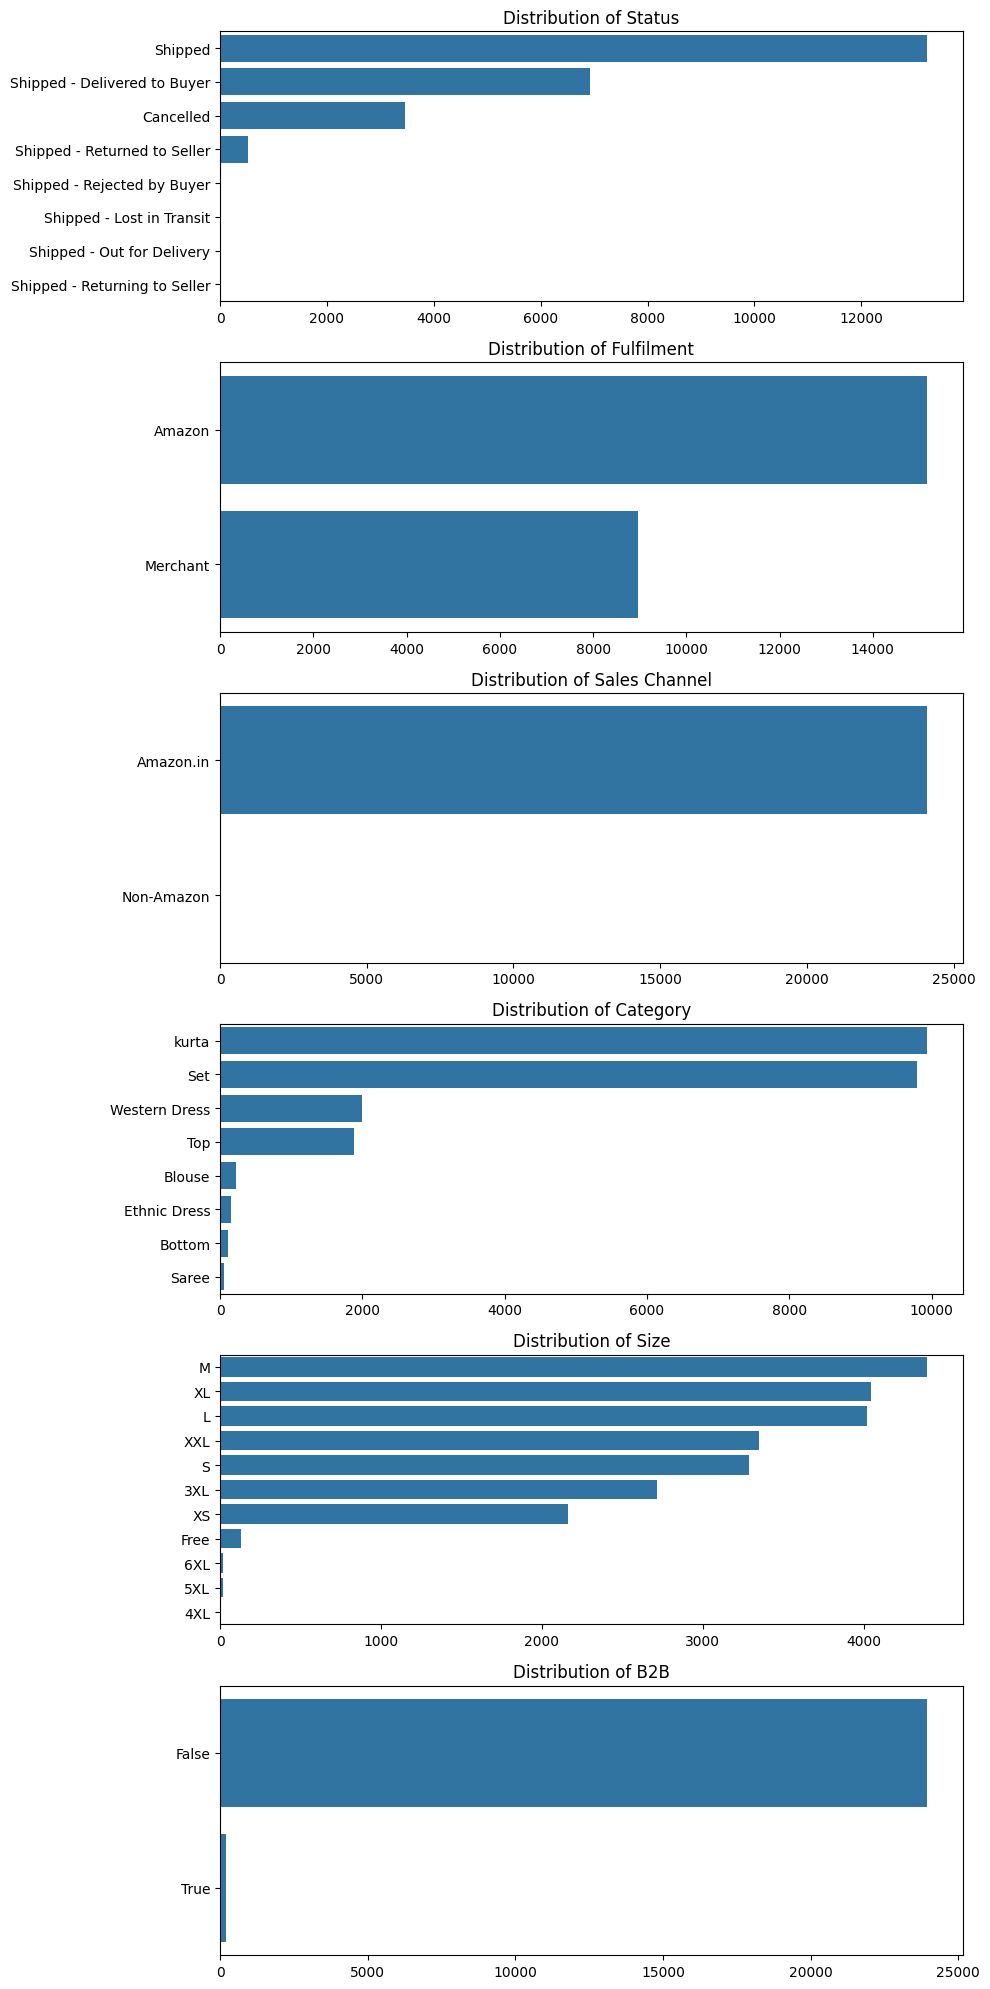

In [19]:
# Correct the column name by stripping extra spaces
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'Date' to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Overview of categorical distributions
categorical_columns = ['Status', 'Fulfilment', 'Sales Channel', 'Category', 'Size', 'B2B']

data.columns = data.columns.str.strip()

# Re-run the count plot visualizations for categorical distributions
fig, axes = plt.subplots(nrows=len(categorical_columns), ncols=1, figsize=(10, 20))

for i, col in enumerate(categorical_columns):
    sns.countplot(y=col, data=data, ax=axes[i], order=data[col].value_counts().index)
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()


# Numerical Data Analysis Outcomes
## Distribution Insights
*   Amount: The distribution of "Amount" is right-skewed, indicating that most transactions involve smaller amounts, with a few larger transactions.
There are evident outliers in the amount data, as seen in the box plot, where some amounts are significantly higher than the general trend.

*   Qty (Quantity): The majority of orders consist of small quantities, predominantly single items, as indicated by the peak at 1 in the histogram.
The box plot confirms that larger quantities are rare but do occur, suggesting bulk purchases or possibly wholesale transactions.

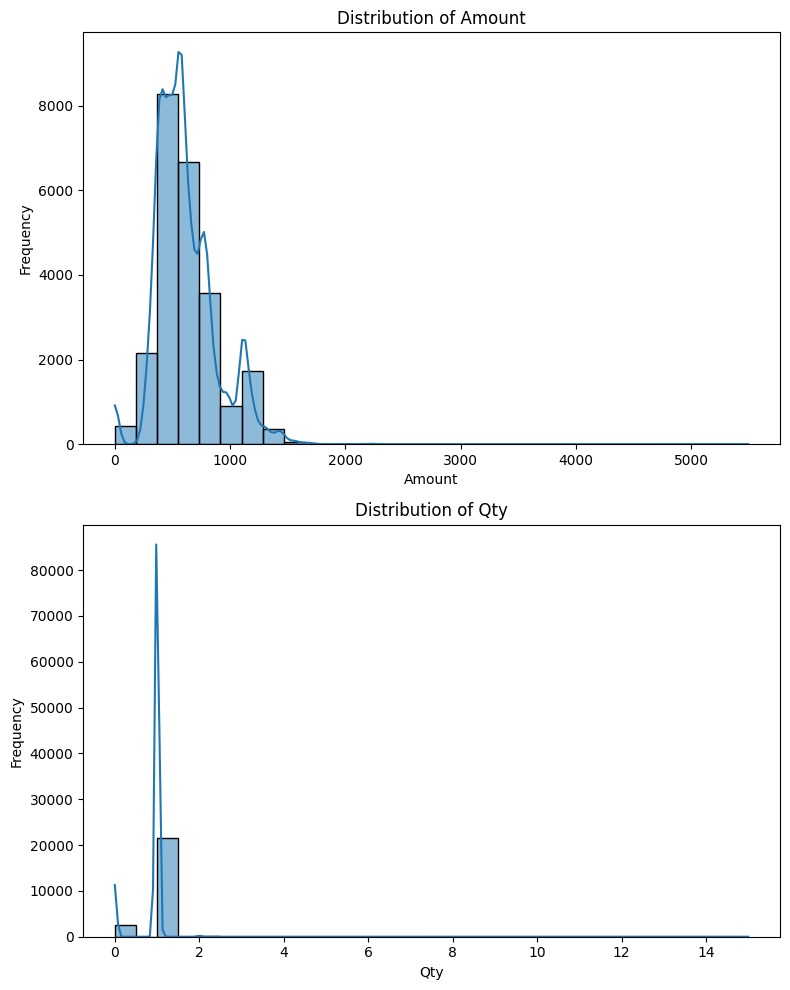

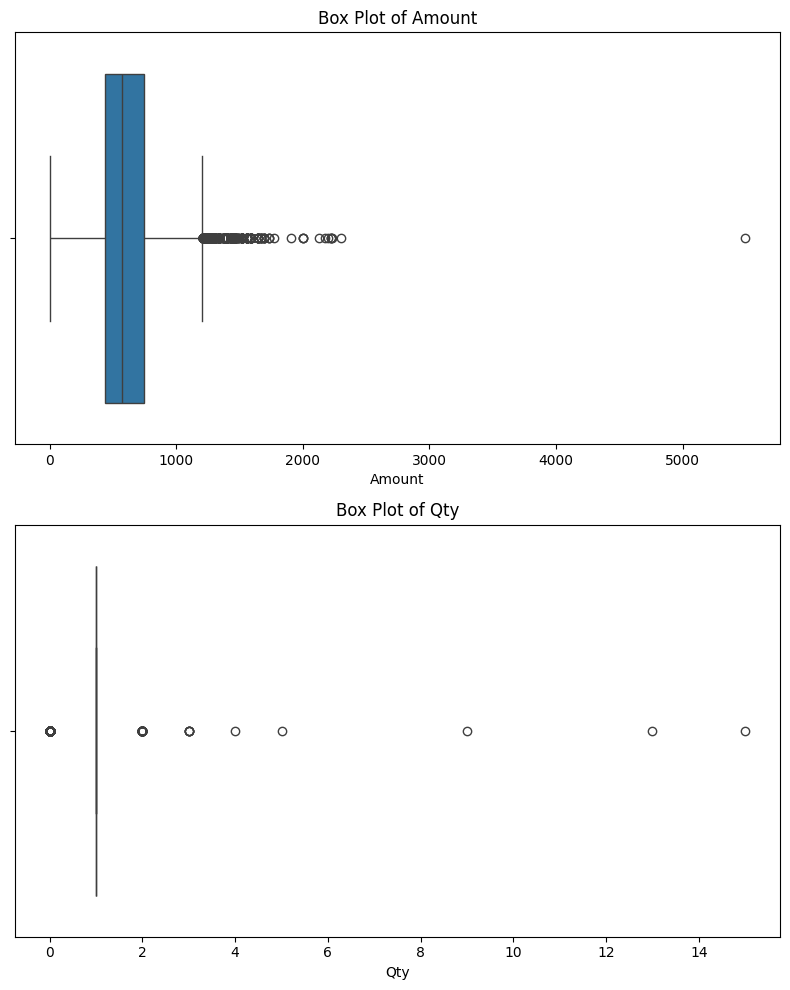

In [20]:
# Plot numerical distributions and relationships
numerical_columns = ['Amount', 'Qty']

# Distribution plots for numerical variables
fig, axes = plt.subplots(nrows=len(numerical_columns), ncols=1, figsize=(8, 10))
for i, col in enumerate(numerical_columns):
    sns.histplot(data[col], bins=30, ax=axes[i], kde=True)
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_ylabel('Frequency')
    axes[i].set_xlabel(col)

plt.tight_layout()
plt.show()

# Boxplot to identify outliers
fig, axes = plt.subplots(nrows=len(numerical_columns), ncols=1, figsize=(8, 10))
for i, col in enumerate(numerical_columns):
    sns.boxplot(x=data[col], ax=axes[i])
    axes[i].set_title(f'Box Plot of {col}')

plt.tight_layout()
plt.show()


# ANOVA Test Outcomes
## The ANOVA test reveals the following:

*   F-statistic: 9715.17, which is significantly high, indicating that there is a strong effect of the category on the order amounts.
*   P-value: Close to 0, suggesting that the differences in average amounts across categories are statistically significant.


*   Interpretation:
The very low p-value (PR(>F) < 0.001) confirms that there are significant differences in the mean order amounts among different categories. This implies that the type of product (category) has a strong influence on the transaction amount, which could be due to varying prices or consumer spending patterns in different product categories.

In [21]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Drop NaN values in 'Amount' and 'Category' for ANOVA analysis
anova_data = data[['Amount', 'Category']].dropna()

# ANOVA model
anova_model = ols('Amount ~ C(Category)', data=anova_data).fit()

# ANOVA table
anova_table = sm.stats.anova_lm(anova_model, typ=2)
anova_table


,sum_sq,df,F,PR(>F)
C(Category),7.072252e+08,7.0,2536.408847,0.0
Residual,9.613239e+08,24134.0,NaN,NaN


# Analysis of Correlation Matrix
Amount vs. Qty:

*   Correlation Coefficient: 0.08. This indicates a very weak positive relationship between the order amount and the quantity of items per order. It suggests that as the quantity of items in an order increases, there may be a slight increase in the total amount of the order, but the effect is minimal.
Amount vs. Fulfilment_Code:

*   Correlation Coefficient: -0.03. There is a negligible negative correlation between the order amount and the fulfilment method (coded as Fulfilment_Code). This implies that the method of fulfilment has almost no influence on the order amount, indicating uniform pricing across different fulfilment options.

*   Qty vs. Fulfilment_Code:
Correlation Coefficient: -0.15. This moderate negative correlation suggests that orders with higher quantities tend to be fulfilled differently than those with fewer quantities. It might indicate that bulk orders or larger quantities are handled differently, possibly due to logistical reasons or specific fulfilment strategies (like direct shipping from suppliers or specific warehouses).

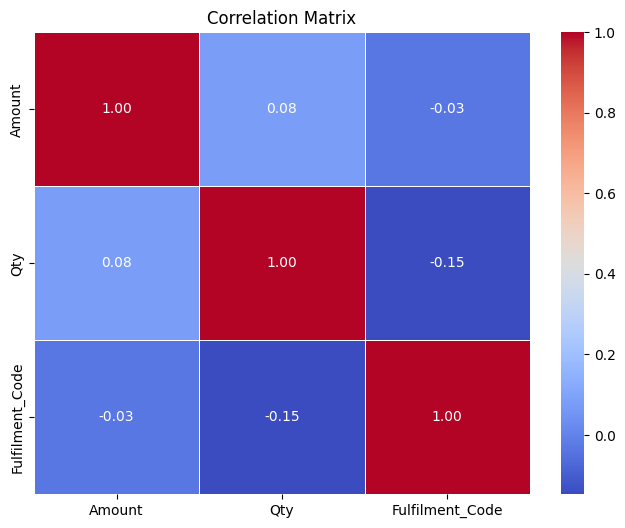

In [22]:
# Convert 'Fulfilment' into a numeric code for correlation analysis
data['Fulfilment_Code'] = data['Fulfilment'].astype('category').cat.codes

# Select numerical and newly converted categorical data
correlation_data = data[['Amount', 'Qty', 'Fulfilment_Code']]

# Compute the correlation matrix
correlation_matrix = correlation_data.corr()

# Plot the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()


# Analysis of the Sales Trend

1. **Rapid Increase in Sales**:
   - Initially, there's a sharp rise in the sales density from mid-April, reaching a peak towards the end of April. This suggests a significant increase in order activity, possibly driven by specific marketing campaigns, seasonal promotions, or other external factors such as holidays or special events.

2. **Stability at the Peak**:
   - The sales density stabilizes at the peak for a brief period, indicating sustained high activity levels. This plateau may reflect a period where sales efforts were maximized, and customer engagement was particularly high.

3. **Sharp Decline**:
   - Following the peak, there is a steep decline in sales density as we move into May. This drop could be due to the end of a promotion period, changes in consumer demand, or possibly inventory issues that could have affected order fulfillment.

### Implications

- **Marketing and Promotions**: The peak in sales density could coincide with effective marketing strategies or promotions. Identifying these activities can help replicate successful tactics in future campaigns.
- **Inventory Management**: The sharp decline after the peak suggests that maintaining sufficient stock levels to meet consumer demand is crucial. It's also essential to ensure that operational efficiencies are managed to sustain high sales periods.
- **Consumer Behavior**: Understanding the factors influencing the buying patterns during this period could provide insights into consumer behavior, aiding in better targeting and customer engagement strategies in future.


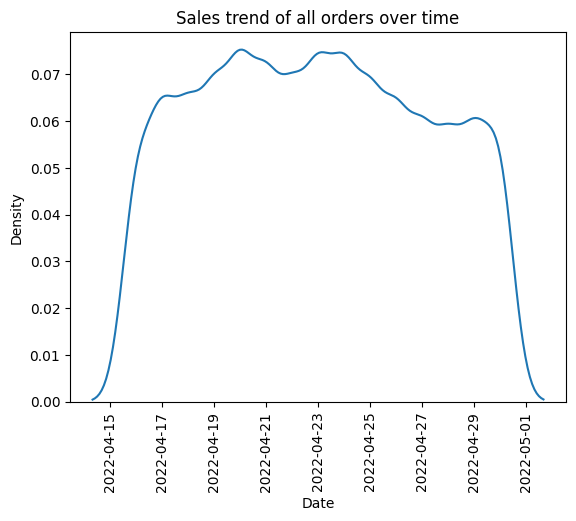

In [23]:
sns.kdeplot(data=data,x="Date")
plt.xticks(rotation=90)
plt.title('Sales trend of all orders over time')
plt.show()

In [24]:
data.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,Fulfilment_Code
0,0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,Unknown,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,1
1,1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,1
2,2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,0
3,3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,Unknown,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,1
4,4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,0


In [75]:
cleaned_data=data.copy()

In [1]:
cleaned_data.to_csv('cleaned_data.csv',sep=',')

NameError: name 'cleaned_data' is not defined

In [126]:
# Load the provided cleaned dataset to inspect and determine a suitable target variable


In [89]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

def data_preparation(file_path, target_column='Courier Status', test_size=0.3, random_seed=45):
    # Load the dataset
    dataset = pd.read_csv(file_path)

    # Mapping dictionaries to convert categorical features to numerical
    b2b_mapping = {False: 0, True: 1}
    status_mapping = {'Shipped': 1, 'Unshipped': 0, 'Cancelled': -1}
    fulfilment_mapping = {'Amazon': 1, 'Merchant': 0}
    service_level_mapping = {'Expedited': 1, 'Standard': 0}

    # Apply the mappings
    dataset[target_column] = dataset[target_column].map(status_mapping)
    dataset['B2B'] = dataset['B2B'].map(b2b_mapping)
    dataset['Fulfilment'] = dataset['Fulfilment'].map(fulfilment_mapping)
    dataset['ship-service-level'] = dataset['ship-service-level'].map(service_level_mapping)

    # Handle missing values in the target column
    dataset[target_column] = dataset[target_column].fillna(-999).astype(int)

    # Select features and target
    feature_columns = ['Fulfilment', 'ship-service-level', 'Qty', 'Amount', 'ship-postal-code', 'B2B']
    X_features = dataset[feature_columns]
    y_target = dataset[target_column]

    # Split the dataset into train and test sets
    X_train_set, X_test_set, y_train_set, y_test_set = train_test_split(X_features, y_target, test_size=test_size, random_state=random_seed)

    # Return the prepared data
    return X_train_set, X_test_set, y_train_set, y_test_set


In [90]:
# Prepare the data
X_train, X_test, y_train, y_test = data_preparation('/content/cleaned_data.csv')

# Now you can use X_train, X_test, y_train, y_test in any model


In [97]:

# Train the Random Forest model
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"RF Model Accuracy: {accuracy:.2f}")
print('_' * 30)
# Generate and print classification report
report = classification_report(y_test, predictions)
print(report)

RF Model Accuracy: 0.96
______________________________
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       299
           1       1.00      0.03      0.07       292
           2       0.96      1.00      0.98      6191

    accuracy                           0.96      6782
   macro avg       0.99      0.68      0.68      6782
weighted avg       0.96      0.96      0.94      6782



In [92]:
from sklearn.metrics import mean_squared_error , mean_absolute_error

model = LogisticRegression(penalty='l2', solver='lbfgs', C=0.1)

model.fit(X_train, y_train)
#testing the model
y_pred = model.predict(X_test)

In [93]:
# Perform K-Fold cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=45)

scores = cross_val_score(model, X, Y, cv=cv, scoring='accuracy')

print("Cross-Validation Accuracy Scores:")
print(scores)
print('_'*30)
print(f"Mean Cross-Validation Accuracy: {scores.mean():.2f}")


Cross-Validation Accuracy Scores:
[0.91707209 0.9071002  0.91572661 0.91218757 0.9093121 ]
______________________________
Mean Cross-Validation Accuracy: 0.91


In [94]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

def prepare_nn_data(file_path):
    # Load the cleaned dataset
    data = pd.read_csv(file_path)

    # Define the mapping dictionaries
    B2B_map = {False: 0, True: 1}
    category_map = {'Shipped': 1, 'Unshipped': 0, 'Cancelled': -1}
    Fulfilment_map = {'Amazon': 1, 'Merchant': 0}
    ship_service_level_map = {'Expedited': 1, 'Standard': 0}

    # Apply the mappings to the corresponding columns
    data['Courier Status'] = data['Courier Status'].map(category_map)
    data['B2B'] = data['B2B'].map(B2B_map)
    data['Fulfilment'] = data['Fulfilment'].map(Fulfilment_map)
    data['ship-service-level'] = data['ship-service-level'].map(ship_service_level_map)

    # Handle missing or invalid values in 'Courier Status' by removing them
    data = data[data['Courier Status'].isin([0, 1, -1])]  # Only keep valid categories

    # Convert 'Courier Status' to a range of 0 to n_classes - 1 for classification
    label_map = {-1: 0, 0: 1, 1: 2}
    data['Courier Status'] = data['Courier Status'].map(label_map)

    # Define the feature columns and the target
    feature_cols = ['Fulfilment', 'ship-service-level', 'Qty', 'Amount', 'ship-postal-code', 'B2B']
    X = data[feature_cols]
    y = data['Courier Status']

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=45)

    # Standardize the features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    return X_train, X_test, y_train, y_test


In [95]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def build_and_train_nn(X_train, y_train, X_test, y_test):
    # Build the neural network model
    model = Sequential()
    model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))  # First hidden layer with 32 neurons
    model.add(Dense(16, activation='relu'))  # Second hidden layer with 16 neurons
    model.add(Dense(len(y_train.unique()), activation='softmax'))  # Output layer with softmax activation

    # Compile the model
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Train the model
    model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

    # Evaluate the model
    test_loss, test_accuracy = model.evaluate(X_test, y_test)
    print(f'NN Model Test Accuracy: {test_accuracy:.2f}')

    # Generate predictions on the test set
    y_pred = model.predict(X_test)

    return model, y_pred


In [96]:
# File path to your cleaned data
file_path = '/content/cleaned_data.csv'

# Prepare the data
X_train, X_test, y_train, y_test = prepare_nn_data(file_path)

# Build, train, and evaluate the neural network model
model, y_pred = build_and_train_nn(X_train, y_train, X_test, y_test)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


396/396 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.8591 - loss: 0.4635 - val_accuracy: 0.9494 - val_loss: 0.2247
Epoch 2/10
396/396 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9575 - loss: 0.2061 - val_accuracy: 0.9539 - val_loss: 0.2068
Epoch 3/10
396/396 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9621 - loss: 0.1858 - val_accuracy: 0.9539 - val_loss: 0.1965
Epoch 4/10
396/396 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9613 - loss: 0.1860 - val_accuracy: 0.9558 - val_loss: 0.1617
Epoch 5/10
396/396 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9598 - loss: 0.1531 - val_accuracy: 0.9558 - val_loss: 0.1610
Epoch 6/10
396/396 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9633 - loss: 0.1413 - val_accuracy: 0.9558 - val_loss: 0.1636
Epoch 7/10
396/396 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9614 - loss: 0.1459 - val_accuracy: 0.9558 - val_loss: 0.1619
Epoch 8/10
396/396 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9608 - loss: 0.1455 - val_accuracy: 0.9558 - val